In [ ]:
!{sys.executable} -m pip install -v "opencv-python==4.5.1.48"
!{sys.executable} -m pip install matplotlib

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt

from pipeline_grid_removal import straighten_page, remove_grid_lines


Load image

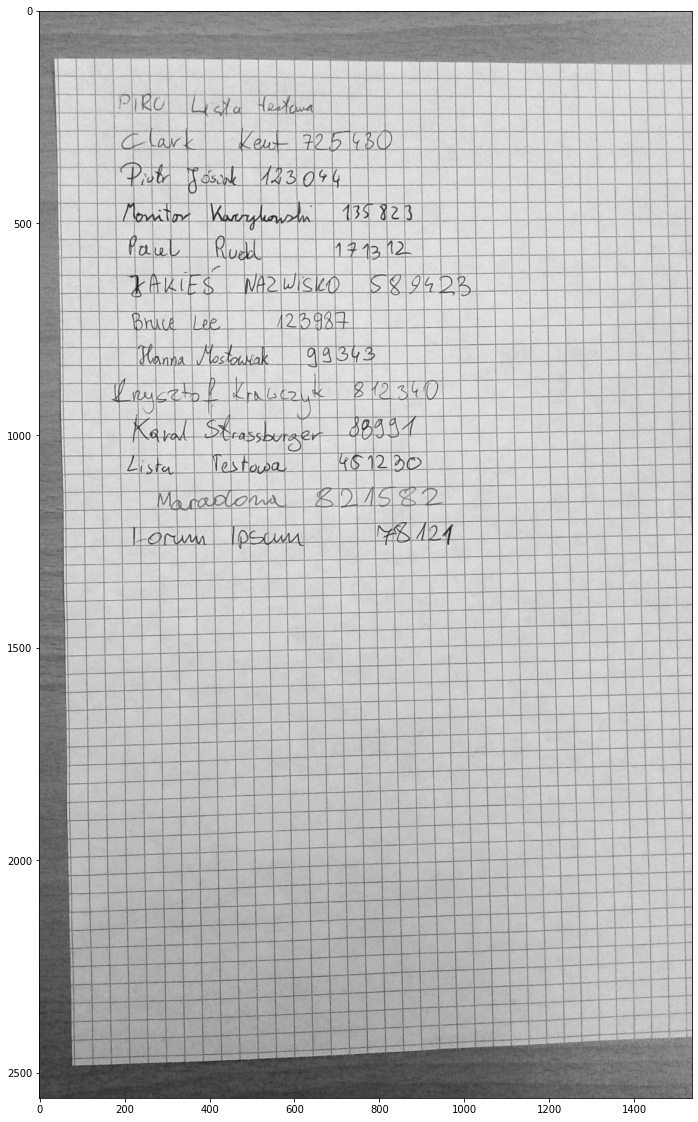

In [3]:
image = cv.imread('data/img_2.jpg', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 20))
plt.imshow(image, cmap='gray')
plt.show()

Straighten image

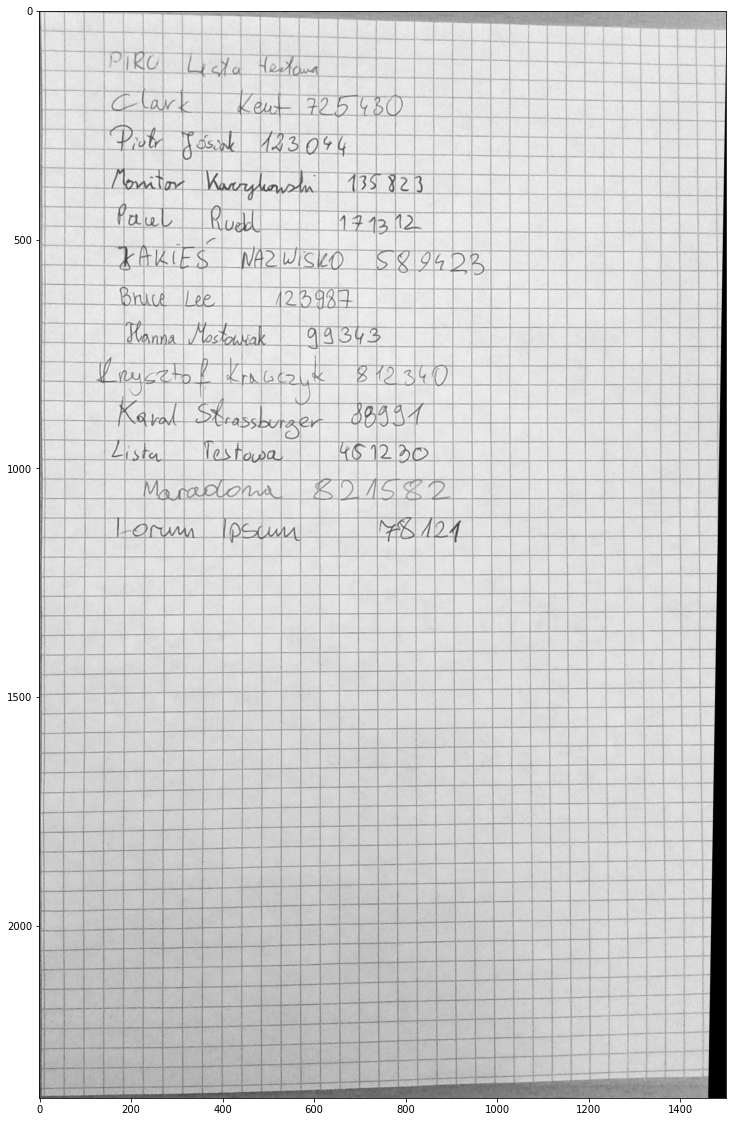

In [4]:
image_straightened, moments = straighten_page(image)


plt.figure(figsize=(20, 20))
plt.imshow(image_straightened, cmap='gray')
plt.show()


Reverse straightening

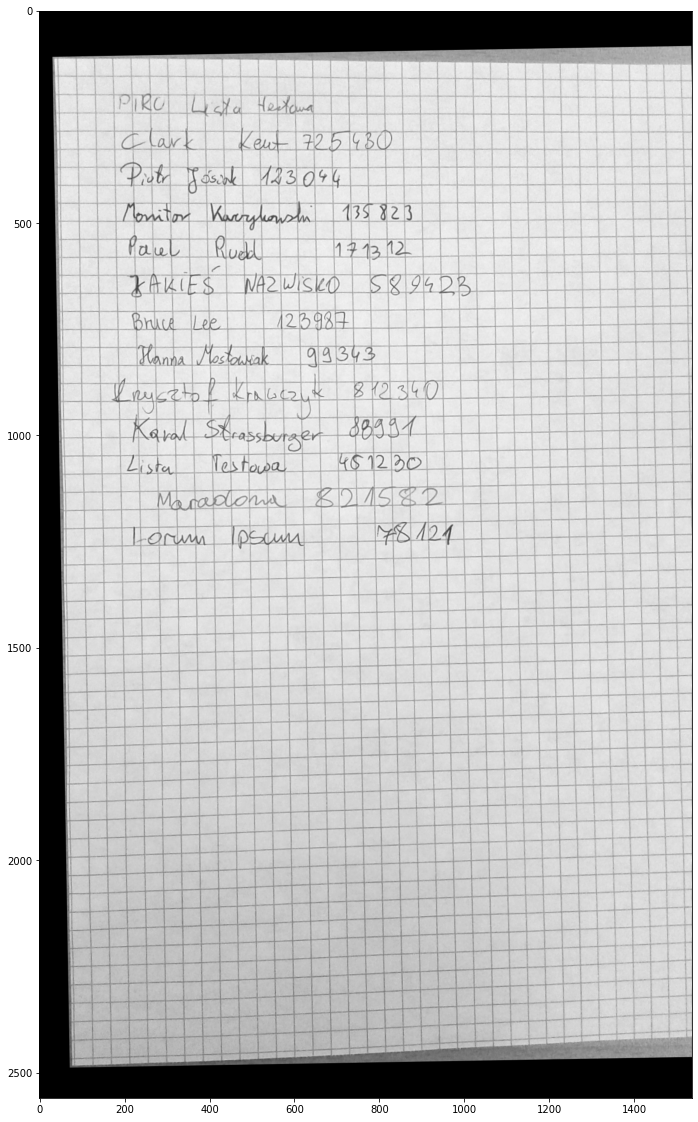

In [6]:
import numpy as np

inv_moments = np.linalg.pinv(moments)
image_reverse_straightened = cv.warpPerspective(image_straightened, inv_moments, (image.shape[1], image.shape[0]))

plt.figure(figsize=(20, 20))
plt.imshow(image_reverse_straightened, cmap='gray')
plt.show()

Remove grid lines

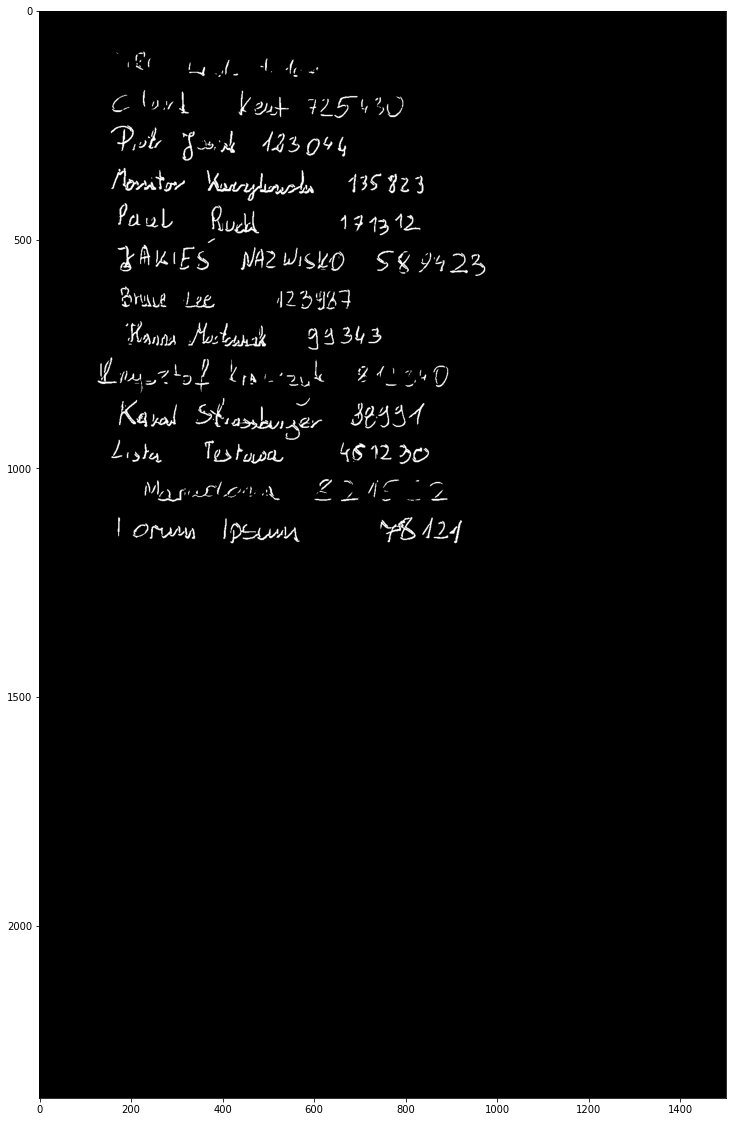

In [ ]:
image_no_grid = remove_grid_lines(image_straightened)

plt.figure(figsize=(20, 20))
plt.imshow(image_no_grid, cmap='gray')
plt.show()

Test on all images

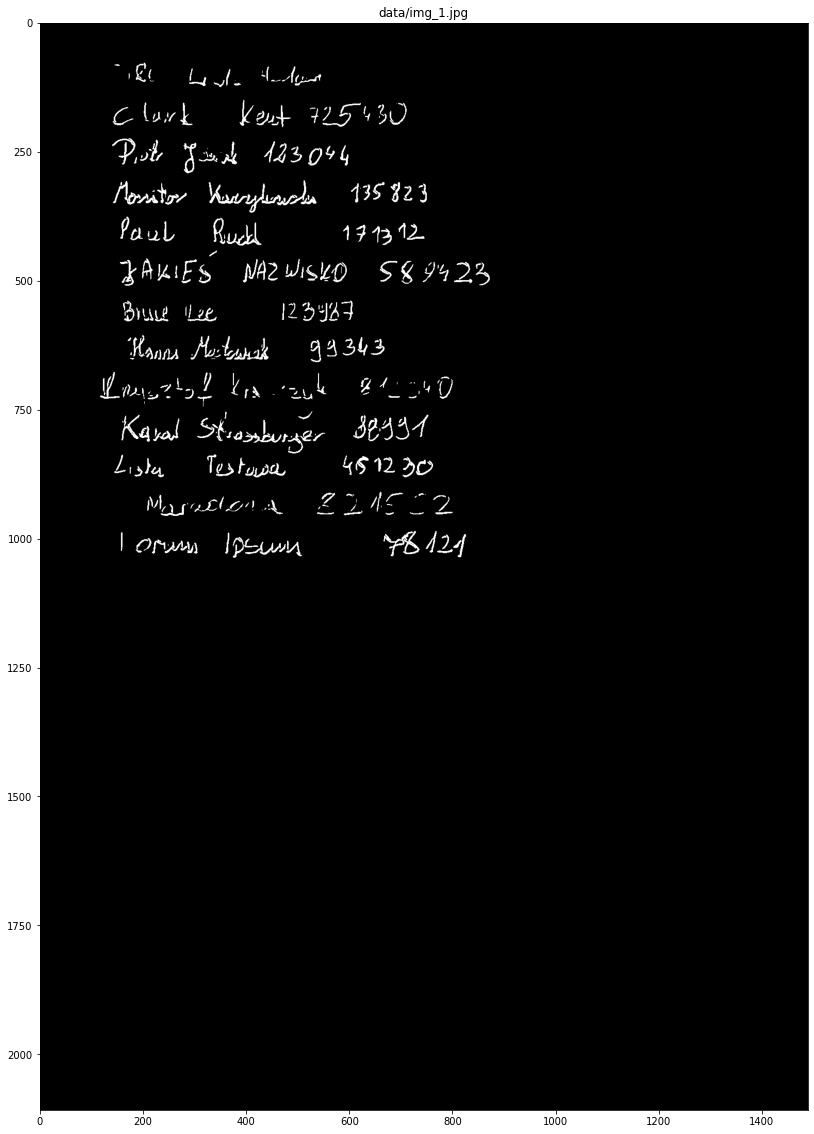

Took : 10.753s


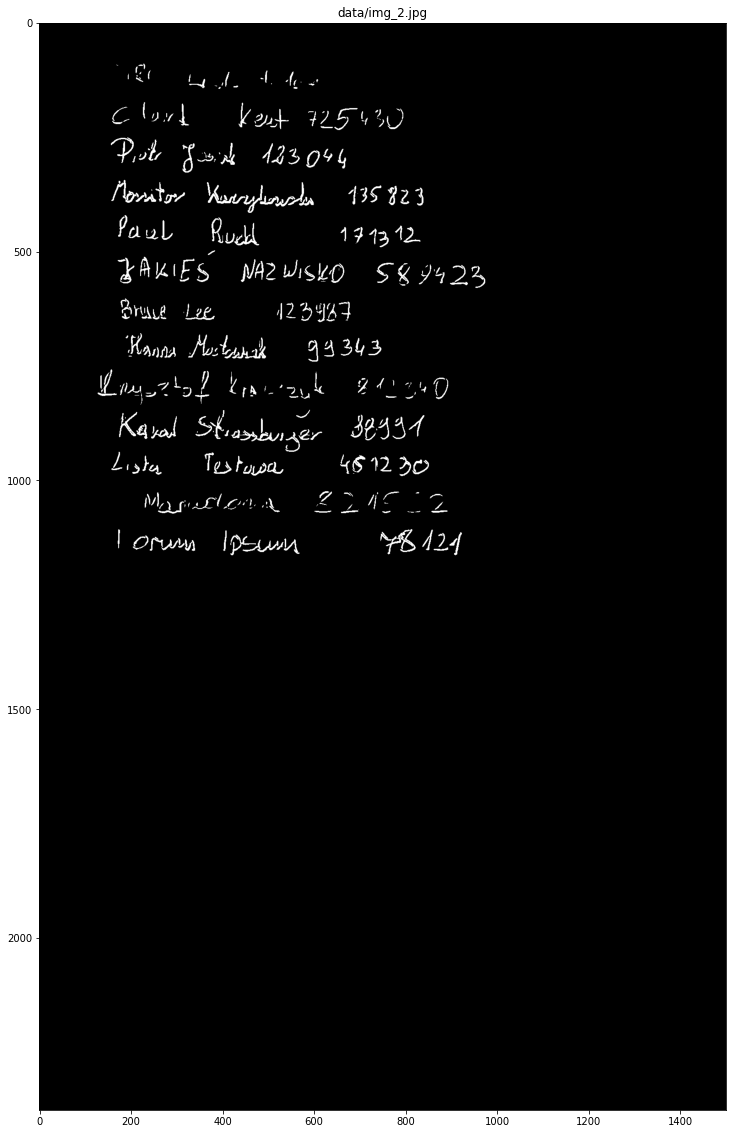

Took : 16.643s


KeyboardInterrupt: 

In [ ]:
from time import time

for i in range(1, 30):
    time_start = time()
    file_path = f'data/img_{i}.jpg'
    image = cv.imread(file_path, cv.IMREAD_GRAYSCALE)
    image_straightened, _ = straighten_page(image)
    image_no_grid = remove_grid_lines(image_straightened)

    plt.figure(figsize=(20, 20))
    plt.title(file_path)
    plt.imshow(image_no_grid, cmap='gray')
    plt.show()
    duration = time() - time_start
    duration = round(duration, 3)
    print(f'Took : {duration}s')